# Import IP102 dataset

In [1]:
# install kaggle library
!pip install -q kaggle

# add Kaggle private api key
!mkdir /root/.kaggle
!echo '{"username":"jgupta07","key":"31b5d3936a3059099e6164fdc8b90c82"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d jgupta07/ip102-dataset

# unzip to working directory
!mkdir /content/ip102
!unzip -q ip102-dataset.zip -d /content/ip102/
!ls

100% 2.94G/2.94G [01:06<00:00, 69.2MB/s]
100% 2.94G/2.94G [01:06<00:00, 47.4MB/s]
ip102  ip102-dataset.zip  sample_data


# Generate class histograms

In [0]:
# customary imports
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import os

# function to get number of examples per class, per dataset
def getClassCounts(dataset_path):
  counts = {}
  root, dirs, _ = next(os.walk(dataset_path))
  for subdir in dirs:
    _, _, files_subdir = next(os.walk(os.path.join(root, subdir)))
    counts[subdir] = len(files_subdir)
  return counts

In [0]:
# call function to get class counts for each dataset
train_dict = getClassCounts('./ip102/train/')
test_dict = getClassCounts('./ip102/test/')
val_dict = getClassCounts('./ip102/val/')

In [0]:
# sort the counts
classes = list(np.arange(0,102))

train_counts = []
for i in classes:
  train_counts.append(train_dict[str(i)])

test_counts = []
for i in classes:
  test_counts.append(test_dict[str(i)])

val_counts = []
for i in classes:
  val_counts.append(val_dict[str(i)])

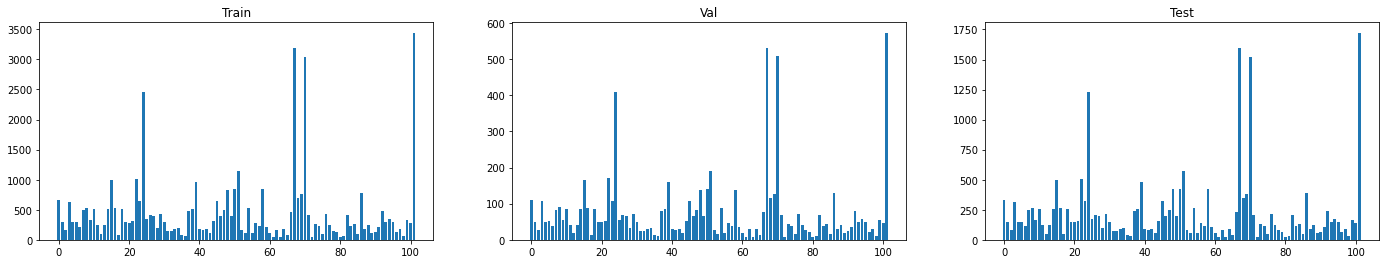

In [9]:
# plot histograms
fig, axs = plt.subplots(1, 3, figsize=(3*8,4))

# train
axs[0].bar(classes, train_counts)
axs[0].set_title("Train")

# val
axs[1].bar(classes, val_counts)
axs[1].set_title("Val")

# test
axs[2].bar(classes, test_counts)
axs[2].set_title("Test")

plt.show()

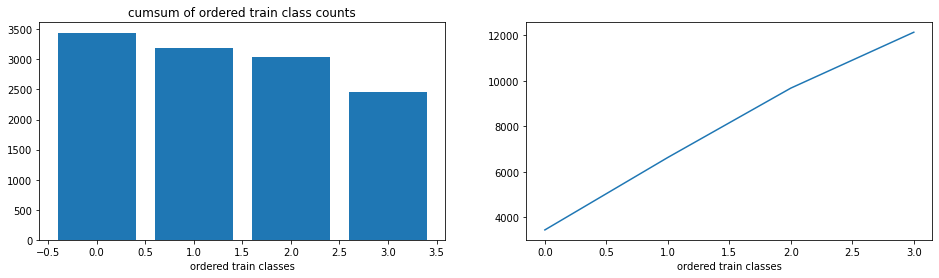

In [67]:
# order the train histograms
mySort = sorted(zip(classes,train_counts), key=lambda x: x[1], reverse=True)
train_classes_ord = [cnum for cnum, count in mySort]
train_counts_ord = [count for cnum, count in mySort][:4]

# compute cumsum
train_counts_cumsum = np.cumsum(train_counts_ord)

# plot
fig, axs = plt.subplots(1, 2, figsize=(2*8,4))

axs[0].bar(np.arange(0,len(train_counts_ord)), train_counts_ord)
axs[0].set_title('ordered train class counts')
axs[0].set_xlabel('ordered train classes')


axs[1].plot(np.arange(0,len(train_counts_ord)), train_counts_cumsum, '-')
axs[0].set_title('cumsum of ordered train class counts')
axs[1].set_xlabel('ordered train classes')

plt.show()